# 📈 Optimizing an Investment Portfolio from Blue-chip Stocks in Vietnam

## 📑 Table of Contents
- **I. Import Portfolio Data**
- **II. Modeling**
  - Portfolio Variance and Volatility
  - Efficient Frontier
  - Optimal Portfolio Asset Weights
- **III. Portfolio Optimization**
  - Stock Filtering
  - Efficient Frontier Plotting
  - Portfolio Optimization Methods
- **IV. Conclusion**

---

## I. Import Portfolio Price Data

The price fluctuation data of selected stocks is collected from the website:  
🔗 [https://vn.investing.com/](https://vn.investing.com/)

The required data fields include:

- `DATE`: Trading date  
- `TICKER`: Stock ticker  
- `OPEN`: Opening price  
- `HIGH`: Highest price during the day  
- `LOW`: Lowest price during the day  
- `CLOSE`: Closing price  
- `VOLUME`: Trading volume  
- `% Change`: % Price Change

In [68]:
# Import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [109]:
# Directory path where all CSV files are stored
directory = "C:\\Users\\laptop\\Downloads\\stock data"

# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Define tickers based on file names (assuming file names contain ticker names)
tickers = [file.split('.')[0] for file in csv_files]

# Initialize an empty dictionary to store DataFrames
data_dict = {}

# Loop through CSV files and tickers to read data and store DataFrames in the dictionary
for file, ticker in zip(csv_files, tickers):
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    df.columns = ["Date","Close", "Open", "High", "Low", "Volume", "%_change"]
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    close_price = df['Close']
    data_dict[ticker] = close_price

# Create the portfolio DataFrame
portfolio = pd.DataFrame(data_dict)

# Display the portfolio DataFrame
portfolio


C:\Users\laptop\AppData\Local\Temp\ipykernel_3176\3474465106.py:18: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\laptop\AppData\Local\Temp\ipykernel_3176\3474465106.py:18: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\laptop\AppData\Local\Temp\ipykernel_3176\3474465106.py:18: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\laptop\AppData\Local\Temp\ipykernel_3176\3474465106.py:18: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or 

,DHG,FPT,GAS,HPG,MSN,MWG,PNJ,VCB,VIC,VNM
Date,,,,,,,,,,
2025-04-18,"96,400.0","111,600.0","58,400.0","25,450.0","58,000","56,200","72,500.00","58,100","66,100","56,600.0"
2025-04-17,"95,000.0","109,400.0","58,100.0","25,500.0","57,300","56,800","69,800.00","58,100","71,000","56,000.0"
2025-04-16,"95,500.0","107,900.0","58,100.0","25,500.0","56,400","56,800","68,600.00","59,300","67,900","56,000.0"
2025-04-15,"96,100.0","116,000.0","58,200.0","25,850.0","58,500","57,100","71,500.00","60,000","70,500","56,300.0"
2025-04-14,"97,400.0","118,500.0","59,200.0","25,350.0","60,000","56,600","73,700.00","59,300","69,600","56,900.0"
...,...,...,...,...,...,...,...,...,...,...
2021-04-27,"90,213.0","56,690.0","76,908.0","31,388.2","80,379","46,899","69,763.10","76,645","117,422","87,880.6"
2021-04-26,"90,213.0","56,900.0","76,908.0","30,719.1","77,918","47,097","69,036.40","76,335","116,889","88,156.1"
2021-04-23,"89,762.0","58,305.0","81,154.0","31,443.9","82,019","48,750","69,763.10","80,516","122,933","91,370.1"


In [110]:
import pandas as pd

portfolio = portfolio.replace({',': ''}, regex=True)
portfolio = portfolio.apply(pd.to_numeric, errors='coerce')
portfolio

,DHG,FPT,GAS,HPG,MSN,MWG,PNJ,VCB,VIC,VNM
Date,,,,,,,,,,
2025-04-18,96400.0,111600.0,58400.0,25450.0,58000,56200,72500.0,58100,66100,56600.0
2025-04-17,95000.0,109400.0,58100.0,25500.0,57300,56800,69800.0,58100,71000,56000.0
2025-04-16,95500.0,107900.0,58100.0,25500.0,56400,56800,68600.0,59300,67900,56000.0
2025-04-15,96100.0,116000.0,58200.0,25850.0,58500,57100,71500.0,60000,70500,56300.0
2025-04-14,97400.0,118500.0,59200.0,25350.0,60000,56600,73700.0,59300,69600,56900.0
...,...,...,...,...,...,...,...,...,...,...
2021-04-27,90213.0,56690.0,76908.0,31388.2,80379,46899,69763.1,76645,117422,87880.6
2021-04-26,90213.0,56900.0,76908.0,30719.1,77918,47097,69036.4,76335,116889,88156.1
2021-04-23,89762.0,58305.0,81154.0,31443.9,82019,48750,69763.1,80516,122933,91370.1


In [111]:
portfolio.div(1000).round(2)

,DHG,FPT,GAS,HPG,MSN,MWG,PNJ,VCB,VIC,VNM
Date,,,,,,,,,,
2025-04-18,96.40,111.60,58.40,25.45,58.00,56.20,72.50,58.10,66.10,56.60
2025-04-17,95.00,109.40,58.10,25.50,57.30,56.80,69.80,58.10,71.00,56.00
2025-04-16,95.50,107.90,58.10,25.50,56.40,56.80,68.60,59.30,67.90,56.00
2025-04-15,96.10,116.00,58.20,25.85,58.50,57.10,71.50,60.00,70.50,56.30
2025-04-14,97.40,118.50,59.20,25.35,60.00,56.60,73.70,59.30,69.60,56.90
...,...,...,...,...,...,...,...,...,...,...
2021-04-27,90.21,56.69,76.91,31.39,80.38,46.90,69.76,76.64,117.42,87.88
2021-04-26,90.21,56.90,76.91,30.72,77.92,47.10,69.04,76.33,116.89,88.16
2021-04-23,89.76,58.30,81.15,31.44,82.02,48.75,69.76,80.52,122.93,91.37


## II. Modeling

### 1. Portfolio Variance and Volatility

#### Covariance and Correlation Matrix

We build the **covariance** and **correlation** matrices to describe how stock returns move in relation to each other:

- **Covariance** measures the relationship between the returns of two different assets.
  - A **positive covariance** indicates that the returns of the two assets move in the same direction.
  - A **negative covariance** indicates that the returns move in opposite directions.
  - By combining assets with **negative covariance**, we can reduce **portfolio risk and volatility** through diversification.

- **Correlation** measures the strength and direction of a linear relationship between two assets. The correlation value ranges from **-1 to +1**:
  - A correlation of **-1** indicates a **perfect negative relationship**: when Asset A increases, Asset B decreases.
  - A correlation of **+1** indicates a **perfect positive relationship**: when Asset A increases, Asset B also increases.
  - A correlation of **0** indicates **no linear relationship**: the two assets move independently.

These matrices are essential for understanding risk and for constructing an optimized and diversified portfolio.


In [112]:
# COVARIANCE MATRIX:
cov_matrix = portfolio.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,DHG,FPT,GAS,HPG,MSN,MWG,PNJ,VCB,VIC,VNM
DHG,0.000268,0.000062,0.000042,0.000069,0.000060,0.000051,0.000043,0.000035,0.000047,0.000036
FPT,0.000062,0.000343,0.000141,0.000180,0.000168,0.000204,0.000153,0.000098,0.000069,0.000093
GAS,0.000042,0.000141,0.000444,0.000159,0.000202,0.000192,0.000141,0.000096,0.000082,0.000085
HPG,0.000069,0.000180,0.000159,0.000484,0.000219,0.000240,0.000145,0.000130,0.000126,0.000095
MSN,0.000060,0.000168,0.000202,0.000219,0.000519,0.000262,0.000178,0.000128,0.000123,0.000122
MWG,0.000051,0.000204,0.000192,0.000240,0.000262,0.000516,0.000198,0.000118,0.000112,0.000102
PNJ,0.000043,0.000153,0.000141,0.000145,0.000178,0.000198,0.000346,0.000091,0.000069,0.000090
VCB,0.000035,0.000098,0.000096,0.000130,0.000128,0.000118,0.000091,0.000422,0.000066,0.000090
VIC,0.000047,0.000069,0.000082,0.000126,0.000123,0.000112,0.000069,0.000066,0.000370,0.000068
VNM,0.000036,0.000093,0.000085,0.000095,0.000122,0.000102,0.000090,0.000090,0.000068,0.000199


In [113]:
# CORRELATION MATRIX
corr_matrix = portfolio.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,DHG,FPT,GAS,HPG,MSN,MWG,PNJ,VCB,VIC,VNM
DHG,1.000000,0.204767,0.121904,0.191178,0.160109,0.136602,0.141485,0.104787,0.147906,0.153764
FPT,0.204767,1.000000,0.361258,0.443072,0.399424,0.485530,0.444064,0.258530,0.192688,0.357592
GAS,0.121904,0.361258,1.000000,0.343150,0.421638,0.402054,0.361240,0.221221,0.202899,0.284845
HPG,0.191178,0.443072,0.343150,1.000000,0.437927,0.479986,0.354120,0.287858,0.297032,0.307439
MSN,0.160109,0.399424,0.421638,0.437927,1.000000,0.505766,0.419607,0.273683,0.280908,0.378710
MWG,0.136602,0.485530,0.402054,0.479986,0.505766,1.000000,0.468113,0.253588,0.256817,0.317227
PNJ,0.141485,0.444064,0.361240,0.354120,0.419607,0.468113,1.000000,0.239152,0.194146,0.342396
VCB,0.104787,0.258530,0.221221,0.287858,0.273683,0.253588,0.239152,1.000000,0.166152,0.309605
VIC,0.147906,0.192688,0.202899,0.297032,0.280908,0.256817,0.194146,0.166152,1.000000,0.249475
VNM,0.153764,0.357592,0.284845,0.307439,0.378710,0.317227,0.342396,0.309605,0.249475,1.000000


**Expected return** is the average amount of profit or loss an investment is expected to generate over a specific period, based on historical returns or probabilistic estimates.  
It represents the mean value of the probability distribution of possible returns, and it helps investors assess the potential reward of an investment.

In [117]:
# Calculate the average annual return of the portfolio
x_return = portfolio.resample('Y').last().pct_change().mean()
x_return

C:\Users\laptop\AppData\Local\Temp\ipykernel_3176\232571128.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  x_return = portfolio.resample('Y').last().pct_change().mean()


DHG   -0.003513
FPT    0.195567
GAS   -0.108353
HPG    0.005635
MSN   -0.187197
MWG   -0.002607
PNJ    0.026081
VCB   -0.045533
VIC   -0.016501
VNM   -0.083601
dtype: float64

**Standard deviation** is a statistical measure that represents the degree of variation or dispersion of a set of values. In the context of financial returns, it measures the volatility or risk of an investment's returns.

In [118]:
# Calculate the annualized standard deviation (volatility) of daily log returns
ann_sd = portfolio.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

DHG    0.258953
FPT    0.292692
GAS    0.333034
HPG    0.347729
MSN    0.360143
MWG    0.358998
PNJ    0.293914
VCB    0.324893
VIC    0.304016
VNM    0.223083
dtype: float64

In [119]:
assets = pd.concat([x_return, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Expected Returns', 'Volatility']
assets

,Expected Returns,Volatility
DHG,-0.003513,0.258953
FPT,0.195567,0.292692
GAS,-0.108353,0.333034
HPG,0.005635,0.347729
MSN,-0.187197,0.360143
MWG,-0.002607,0.358998
PNJ,0.026081,0.293914
VCB,-0.045533,0.324893
VIC,-0.016501,0.304016
VNM,-0.083601,0.223083


### 2. Efficient Frontier

#### Portfolio Variance:
Portfolio variance is an important indicator that reflects how a portfolio's value fluctuates over time. It measures the risk or volatility associated with the portfolio's returns. The formula for portfolio variance, considering two assets, is as follows:

$$
\text{variance} = (w_1 \sigma_1)^2 + (w_2 \sigma_2)^2 + 2w_1w_2 \text{Cov}(1,2)
$$

Where:
- $w_1$: Weight of asset 1
- $w_2$: Weight of asset 2
- $\sigma_1$: Standard deviation (volatility) of asset 1
- $\sigma_2$: Standard deviation (volatility) of asset 2
- $\text{Cov}(1,2)$: Covariance between the two assets

#### Expected Portfolio Return:
To calculate the expected return of the portfolio, we need to determine the weights for the chosen assets. This means deciding the percentage of the total investment allocated to each stock. The process of portfolio optimization is essentially about finding the optimal weights that maximize expected return while minimizing risk (standard deviation).

#### Efficient Frontier:
To plot the **Efficient Frontier**, a loop needs to be executed. In each iteration, the loop considers different weight combinations for the assets and calculates the return and volatility (standard deviation) for each portfolio combination.

The Efficient Frontier is a graphical representation that shows the best possible return for a given level of risk or the least risk for a given level of return. By optimizing the portfolio's weights, investors can make decisions that align with their risk tolerance and return objectives.


In [120]:
p_ret = [] # Initialize an empty array (expected returns of the portfolio)
p_vol = [] # Initialize an empty array (volatility of the portfolio)
p_weights = [] # Initialize an empty array (weights of the assets)

num_assets = len(portfolio.columns)
num_portfolios = 10000

In [121]:
for port in range(num_portfolios):
    weights = np.random.random(num_assets) # Generate a random array with 10 elements between 0 and 1
    weights = weights/np.sum(weights) # Normalize the weights so that the sum of the proportions equals 100%
    p_weights.append(weights) # Store this weight array in p_weights
    returns = np.dot(weights, x_return) # Perform dot product of stock weights and expected returns 
    p_ret.append(returns) # Store this returns array in p_ret
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Calculate the portfolio variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annualized standard deviation = stock volatility
    p_vol.append(ann_sd) # Store the standard deviation in p_vol

In [122]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(portfolio.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [123]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,DHG weight,FPT weight,GAS weight,HPG weight,MSN weight,MWG weight,PNJ weight,VCB weight,VIC weight,VNM weight
0,-0.036393,0.191837,0.096887,0.033417,0.128236,0.120854,0.102437,0.047088,0.116070,0.173614,0.148541,0.032856
1,-0.019299,0.193195,0.158795,0.134833,0.119393,0.029039,0.145972,0.062551,0.138653,0.159412,0.046003,0.005349
2,-0.043729,0.187614,0.142887,0.021261,0.069401,0.011150,0.135791,0.140838,0.090182,0.035384,0.218149,0.134959
3,-0.015049,0.175269,0.202996,0.089596,0.070622,0.098052,0.016226,0.108154,0.012547,0.135413,0.099415,0.166979
4,-0.010869,0.184256,0.095921,0.091613,0.115919,0.064470,0.009176,0.051814,0.180664,0.212444,0.081103,0.096874


The 'portfolios' dataframe contains 10,000 portfolio allocation strategies. Next, we will need to plot the correlation between returns and volatility for these 10,000 scenarios to identify the most efficient portfolio.

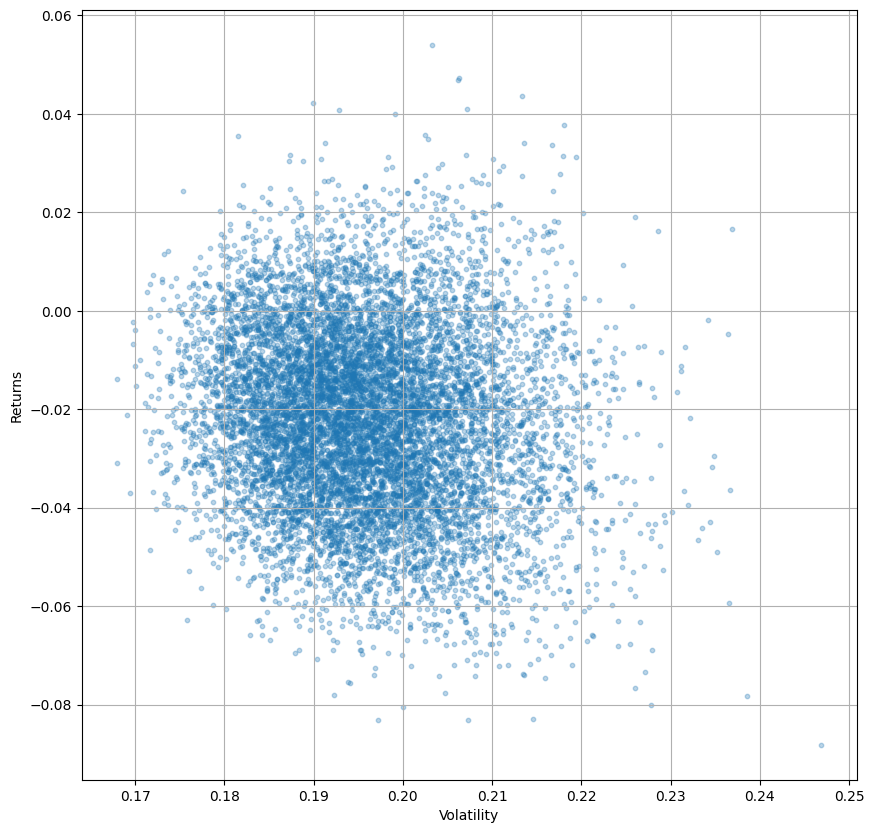

In [124]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10]);

The left boundary represents the optimal stock portfolio that maximizes returns with the lowest risk.

Points within the cloud are not optimal for a given level of risk. For each point inside, there always exists another point with higher returns for the same level of risk.


### 3. Optimal Portfolio Weights - Sharpe Ratio

To find the best portfolio, I will use the Sharpe Ratio. This is a measure of how much return is generated per unit of risk when investing in an asset or a business strategy. This index helps compare the performance of different portfolios based on the balance between risk and return.

The higher the Sharpe Ratio of a portfolio, the better its risk-adjusted performance. If the Sharpe ratio is negative, it means the risk-free rate is greater than the return of the portfolio, or the expected return of the portfolio will be negative.

#### Sharpe Ratio Formula:

Sharpe Ratio = (Rp - Rf) / SDp

Where:
- **Rp**: Portfolio return
- **Rf**: Risk-free rate (set to 0.01)
- **SDp**: Standard deviation of the portfolio's returns (indicating the level of risk)


In [125]:
#Sharpe Ratio of portfolios
rf = 0.01
Sharpe_Port = (portfolios['Returns']-rf)/portfolios['Volatility']
Sharpe_Port

0      -0.241838
1      -0.151655
2      -0.286382
3      -0.142916
4      -0.113258
          ...   
9995   -0.065066
9996   -0.258454
9997   -0.143752
9998   -0.184894
9999   -0.121177
Length: 10000, dtype: float64

In [126]:
#Portfolio with the Highest Sharpe Ratio
optimal_risky_port = portfolios.iloc[Sharpe_Port.idxmax()]
optimal_risky_port

Returns       0.054035
Volatility    0.203249
DHG weight    0.069001
FPT weight    0.344059
GAS weight    0.088653
HPG weight    0.114867
MSN weight    0.004011
MWG weight    0.067114
PNJ weight    0.121717
VCB weight    0.071724
VIC weight    0.102872
VNM weight    0.015982
Name: 2273, dtype: float64

In [127]:
optimal_risky_port.sort_values(ascending = False)

FPT weight    0.344059
Volatility    0.203249
PNJ weight    0.121717
HPG weight    0.114867
VIC weight    0.102872
GAS weight    0.088653
VCB weight    0.071724
DHG weight    0.069001
MWG weight    0.067114
Returns       0.054035
VNM weight    0.015982
MSN weight    0.004011
Name: 2273, dtype: float64

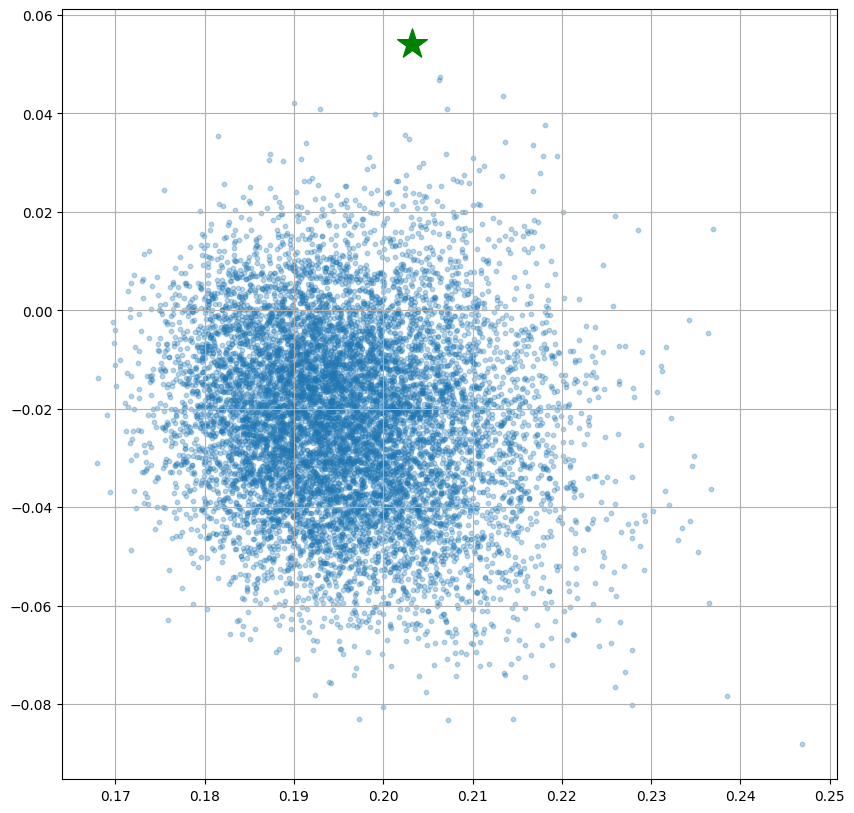

In [128]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3);
plt.grid()
plt.scatter(optimal_risky_port['Volatility'], optimal_risky_port['Returns'], color='g', marker='*', s=500);

**Highlight**: The optimal portfolio is determined based on the **Sharpe Ratio**. With this portfolio strategy, I will focus the majority of my investment capital on the four stocks: **FPT, PNJ, HPG, and VIC**.


### III. Portfolio Optimization
For the four selected stocks, we will follow a similar process to calculate the optimal weights for each stock in order to maximize the effectiveness of the investment strategy.
#### 1. Stock Selection



In [218]:
selected = portfolio[["FPT", "VIC", "HPG", "PNJ"]]
selected

,FPT,VIC,HPG,PNJ
Date,,,,
2025-04-18,111600.0,66100,25450.0,72500.0
2025-04-17,109400.0,71000,25500.0,69800.0
2025-04-16,107900.0,67900,25500.0,68600.0
2025-04-15,116000.0,70500,25850.0,71500.0
2025-04-14,118500.0,69600,25350.0,73700.0
...,...,...,...,...
2021-04-27,56690.0,117422,31388.2,69763.1
2021-04-26,56900.0,116889,30719.1,69036.4
2021-04-23,58305.0,122933,31443.9,69763.1


#### 2. Efficient Frontier
Covariance and Correlation

In [219]:
#COVARIANCE MATRIX
sel_cov_matrix = selected.pct_change().apply(lambda x: np.log(1+x)).cov()
sel_cov_matrix

,FPT,VIC,HPG,PNJ
FPT,0.000343,0.000069,0.000180,0.000153
VIC,0.000069,0.000370,0.000126,0.000069
HPG,0.000180,0.000126,0.000484,0.000145
PNJ,0.000153,0.000069,0.000145,0.000346


In [220]:
#CORRELATION MATRIX
sel_corr_matrix = selected.pct_change().apply(lambda x: np.log(1+x)).corr()
sel_corr_matrix

,FPT,VIC,HPG,PNJ
FPT,1.000000,0.192688,0.443072,0.444064
VIC,0.192688,1.000000,0.297032,0.194146
HPG,0.443072,0.297032,1.000000,0.354120
PNJ,0.444064,0.194146,0.354120,1.000000


Expected Returns & Volatility

In [221]:
sel_return = selected.resample('Y').last().pct_change().mean()
sel_return

C:\Users\laptop\AppData\Local\Temp\ipykernel_3176\2010011495.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sel_return = selected.resample('Y').last().pct_change().mean()


FPT    0.195567
VIC   -0.016501
HPG    0.005635
PNJ    0.026081
dtype: float64

In [222]:
sel_ann_sd = selected.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
sel_ann_sd

FPT    0.292692
VIC    0.304016
HPG    0.347729
PNJ    0.293914
dtype: float64

In [223]:
sel_assets = pd.concat([sel_return, sel_ann_sd], axis=1) # visualizing return and volatility
sel_assets.columns = ['Returns', 'Volatility']
sel_assets

,Returns,Volatility
FPT,0.195567,0.292692
VIC,-0.016501,0.304016
HPG,0.005635,0.347729
PNJ,0.026081,0.293914


Efficient Frontier

In [224]:
sel_p_ret = [] # Define an empty array for portfolio returns
sel_p_vol = [] # Define an empty array for portfolio volatility
sel_p_weights = [] # Define an empty array for asset weights

sel_num_assets = len(selected.columns)
num_selected = 10000

In [225]:
for port in range(num_selected):
    sel_weights = np.random.random(sel_num_assets)
    sel_weights = sel_weights/np.sum(sel_weights)
    sel_p_weights.append(sel_weights)
    sel_returns = np.dot(sel_weights, sel_return)
    sel_p_ret.append(sel_returns)
    sel_var = sel_cov_matrix.mul(sel_weights, axis=0).mul(sel_weights, axis=1).sum().sum()# Portfolio Variance
    sel_sd = np.sqrt(sel_var) # Daily standard deviation
    sel_ann_sd = sel_sd*np.sqrt(250) # Annual standard deviation = volatility
    sel_p_vol.append(sel_ann_sd)

In [226]:
sel_data = {'Returns':sel_p_ret, 'Volatility':sel_p_vol}

for counter, symbol in enumerate(selected.columns.tolist()):
    sel_data[symbol+' weight'] = [w[counter] for w in sel_p_weights]

In [227]:
sel_portfolios  = pd.DataFrame(sel_data)
sel_portfolios

,Returns,Volatility,FPT weight,VIC weight,HPG weight,PNJ weight
0,0.085312,0.220690,0.440686,0.277839,0.177469,0.104006
1,0.025745,0.222912,0.103803,0.270699,0.313121,0.312377
2,0.018083,0.242151,0.010272,0.156587,0.150187,0.682955
3,0.064344,0.232293,0.311397,0.164083,0.368172,0.156348
4,0.067012,0.217786,0.315872,0.198964,0.202090,0.283075
...,...,...,...,...,...,...
9995,0.024513,0.246655,0.086045,0.139711,0.498993,0.275251
9996,0.037631,0.227460,0.141609,0.151268,0.293892,0.413231
9997,0.065599,0.232974,0.312122,0.138718,0.365602,0.183557
9998,0.100913,0.247823,0.444235,0.007363,0.007121,0.541281


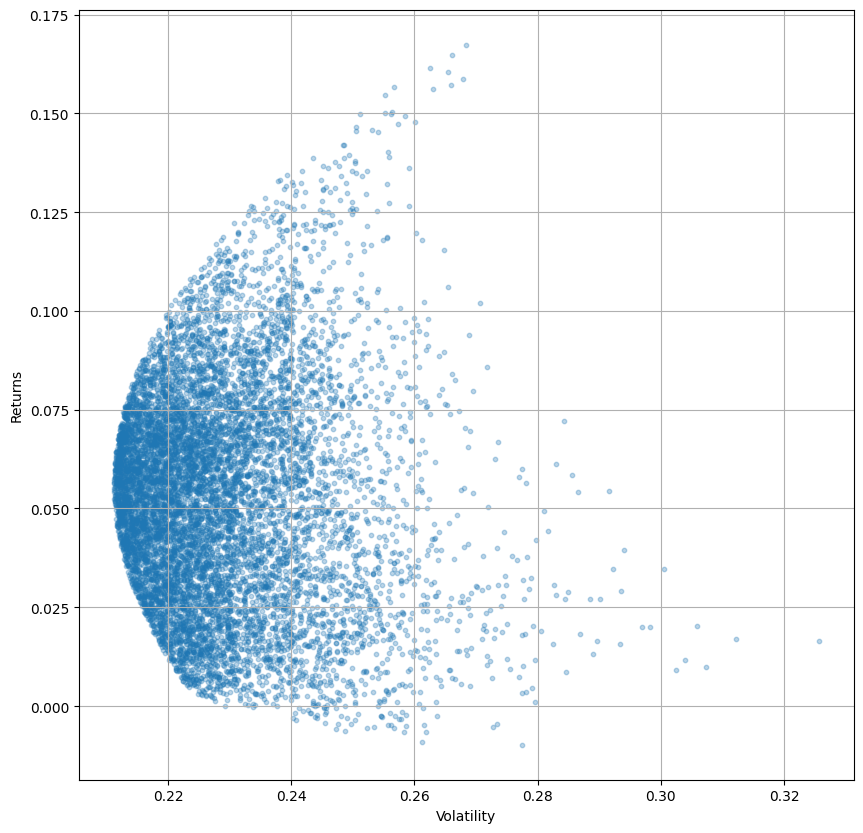

In [228]:
sel_portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10]);


#### 3. Portfolio Optimization Methods
**Portfolio with minimum Volatility (Risk)**

In [229]:
min_vol_port = sel_portfolios.iloc[sel_portfolios['Volatility'].idxmin()] #filter portfolio with minimum volatility 
min_vol_port

Returns       0.056509
Volatility    0.211226
FPT weight    0.276605
VIC weight    0.345348
HPG weight    0.085422
PNJ weight    0.292625
Name: 2390, dtype: float64

The portfolio with the lowest risk has the following weights for the stocks FPT, VIC, HPG, and PNJ: 28%, 34%, 9%, and 29%, respectively. The position of this portfolio is represented in the chart as follows:


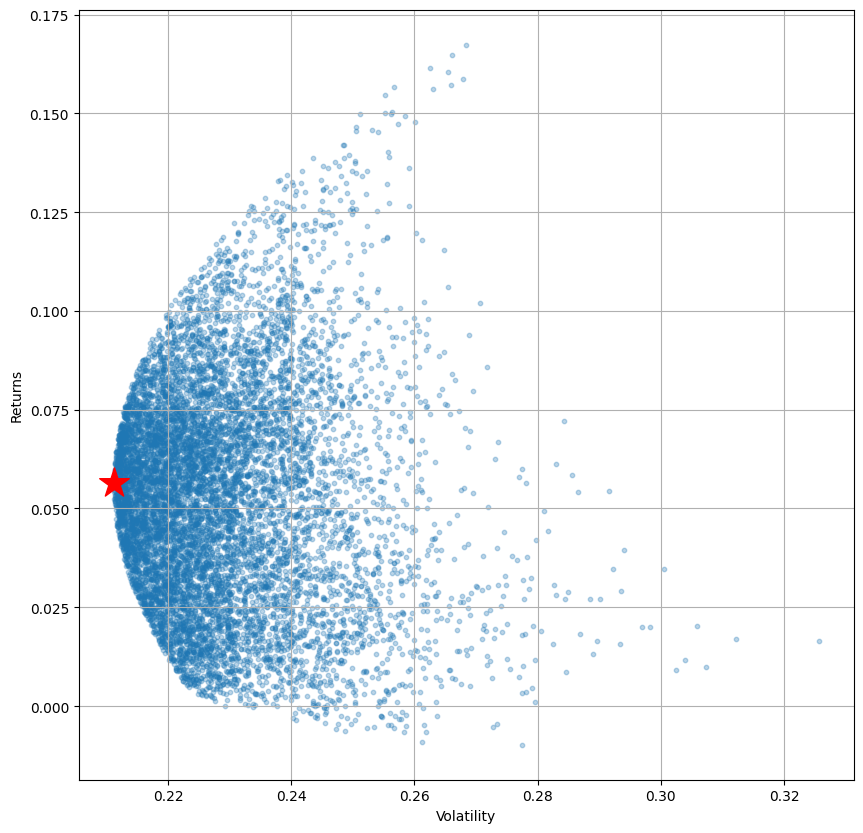

In [230]:
plt.subplots(figsize=[10,10])
plt.scatter(sel_portfolios['Volatility'], sel_portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port['Volatility'], min_vol_port['Returns'], color='r', marker='*', s=500);
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Returns');

The position highlighted in red represents the most efficient portfolio in terms of risk level.


**Optimal Portfolio (Maximum Sharpe Ratio)**

In [231]:
rf = 0.01 #risk free rate factor
sel_sharpe_port = (portfolios['Returns']-rf)/portfolios['Volatility']
sel_sharpe_port

0      -0.241838
1      -0.151655
2      -0.286382
3      -0.142916
4      -0.113258
          ...   
9995   -0.065066
9996   -0.258454
9997   -0.143752
9998   -0.184894
9999   -0.121177
Length: 10000, dtype: float64

In [233]:
optimal_portfolio = sel_portfolios.iloc[sel_sharpe_port.idxmax()]
optimal_portfolio.sort_values()

VIC weight    0.092876
Returns       0.094044
HPG weight    0.122357
Volatility    0.228422
PNJ weight    0.345675
FPT weight    0.439091
Name: 2273, dtype: float64

The portfolio with the highest Sharpe ratio has the following asset allocation: VIC (9%), HPG (12%), PNJ (35%), and VTK (44%).

Compared to the portfolio with the lowest risk, this optimal portfolio has a risk ratio that is only 1% higher (22.8% vs 21.1%). However, the expected return of this portfolio is 4% higher (9.4% vs 5.6%). Therefore, the trade-off between risk and expected return is entirely effective.


Text(0, 0.5, 'Returns')

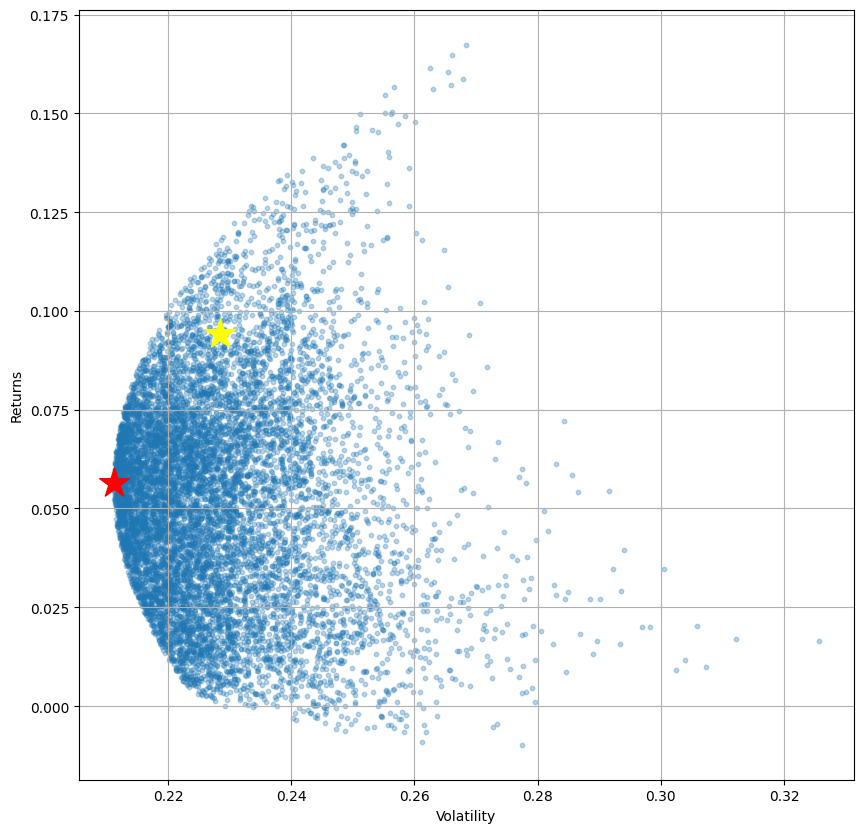

In [234]:
plt.subplots(figsize=(10, 10))
plt.scatter(sel_portfolios['Volatility'], sel_portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port['Volatility'], min_vol_port['Returns'], color='red', marker='*', s=500)
plt.scatter(optimal_portfolio['Volatility'], optimal_portfolio['Returns'], color='yellow', marker='*', s=500);
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Returns')

## IV. Conclusion

In this analysis, we focused on building an optimal investment portfolio from a group of **Vietnamese blue-chip stocks**, with the goal of selecting only four stocks to allocate capital efficiently. Portfolio optimization in this context involves balancing the trade-off between risk and return, where return refers to the realized profit over time, and risk is measured by the standard deviation of the asset's price.

Several optimization approaches are available, many of which are extensions of diversification strategies in investment theory. The key idea is that owning a diversified portfolio of different assets is less risky than concentrating investment in similar ones.

Finding the appropriate method for portfolio optimization plays an essential role in investment decision-making and is widely used by investment banks and asset management firms. One of the earliest methods applied was the **mean-variance optimization** based on **Modern Portfolio Theory (MPT)**. While this method lays a strong foundation, it comes with limitations such as assuming that historical returns fully represent future performance, which might not hold in dynamic market conditions. MPT also relies on certain standard assumptions about market behavior, which may not always be accurate.

To address these challenges, alternative methods such as **Hierarchical Risk Parity (HRP)** or **Modified Conditional Value at Risk (mCVAR)** can be considered, as they provide more flexibility in accounting for the ever-changing nature of financial markets.

Ultimately, portfolio optimization for a selected group of **Vietnamese blue-chip stocks**—narrowed down to four investment choices—plays a vital role in enhancing risk-adjusted returns and effective risk management. By using a systematic approach, investors can align their portfolio with financial objectives, achieve better diversification, and navigate market volatility more confidently.
